Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [27]:
# cell for imports. All imports must go here.
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

titanic = pd.read_csv('drive/MyDrive/python_practices/train.csv')

In [4]:
titanic.info()
titanic[:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

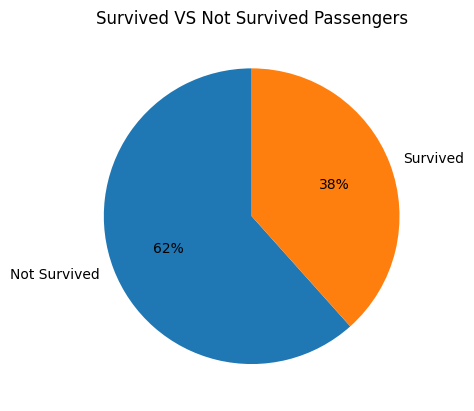

In [5]:
survived_series = titanic['Survived'].value_counts()
labels = ['Not Survived', 'Survived']
pie_chart = survived_series.plot(kind='pie', labels=labels, autopct='%1.0f%%', startangle=90)
pie_chart.set_ylabel('')
pie_chart.set_title('Survived VS Not Survived Passengers')
plt.show()

The pie chart has been created to show the ratio of passengers who survived to those who did not survive on the Titanic. According to the chart:

- 38.4% of the passengers survived.
- 61.6% of the passengers did not survive.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


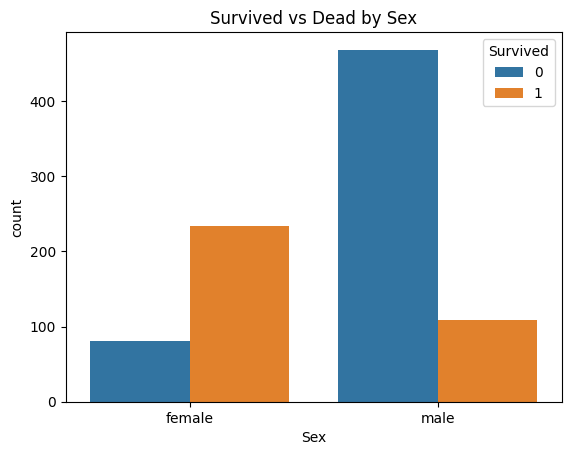

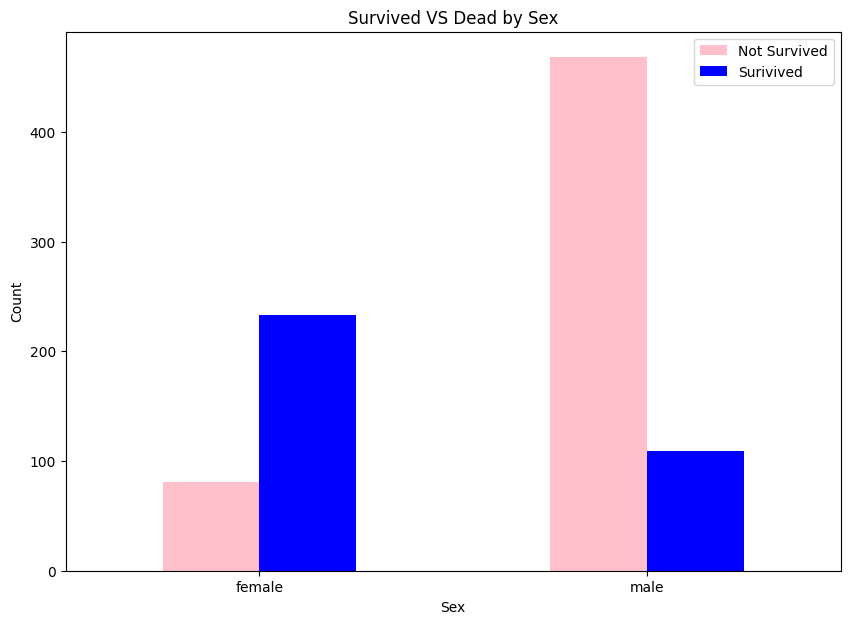

In [20]:
survived_count_sex = titanic.groupby(['Sex','Survived'], as_index=False).size()

bar_chart = survived_count_sex.pivot(index='Sex', columns='Survived', values = 'size').plot(
    kind='bar',
    color=['pink','blue'],
    figsize=(10,7)
)

bar_chart.set_title('Survived VS Dead by Sex')
bar_chart.set_xlabel('Sex')
bar_chart.set_ylabel('Count')
plt.xticks(rotation=0)
bar_chart.legend(labels=['Not Survived', 'Surivived'])


plt.show()

The bar chart provides a detailed comparison of survival rates between male and female passengers on the Titanic:

- For female passengers, the number who survived is noticeably higher than the number who did not. This suggests that female passengers had a higher survival rate compared to their male counterparts.
- For male passengers, the situation is reversed. A significantly larger portion of male passengers did not survive. The bar representing non-survivors is almost 4 times higher than the bar for survivors, indicating a much lower survival rate for men.

This visual data representation aligns with historical accounts that indicate women and children were given priority for lifeboat spots during the sinking of the Titanic.




4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

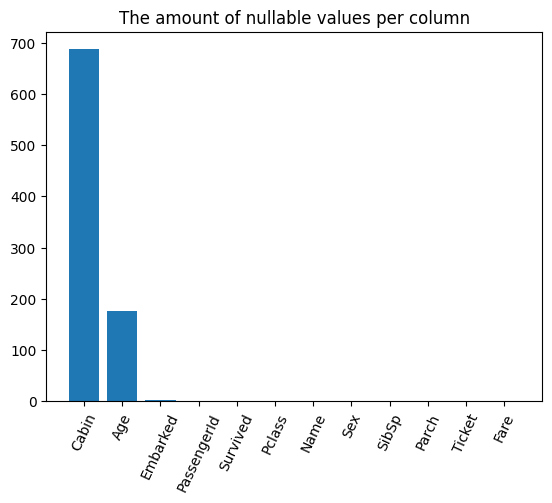

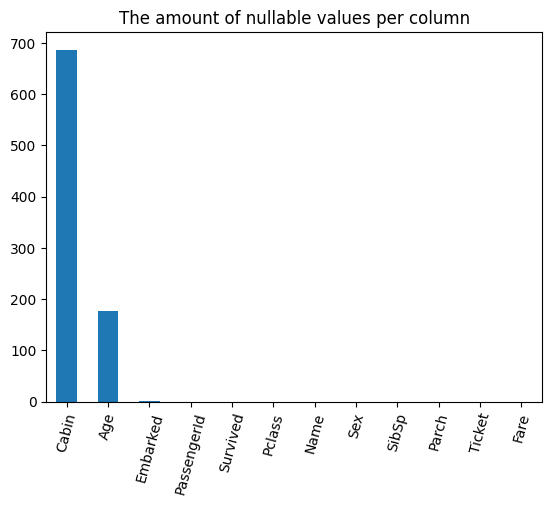

In [25]:
titanic_null_values = titanic.isnull().sum()
titanic_null_values = titanic_null_values.sort_values(ascending=False)
titanic_null_values.plot(kind='bar')
plt.title('The amount of nullable values per column')
plt.xticks(rotation = 75)
plt.show()


This chart visualizes the number of missing values for each variable, sorted from the highest to the lowest, with 'Cabin' having the most missing values, followed by 'Age' and a bit of'Embarked'. ​Other columns don't have nullable values.

- The high number o'Cabin' missing values suggests that a lot of people did not have cabin.
- Missing values for age indicate that the age of a considerable number of passengers was not recorded.
- 'Embarked' variable represents the port of embarkation for each passenger, and missing values indicate that there isn't any info about what port exactly some passangers joined (probably the ones with the cheapest tickets).

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

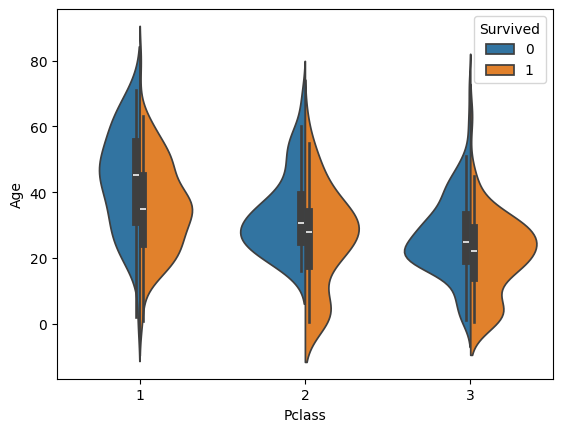

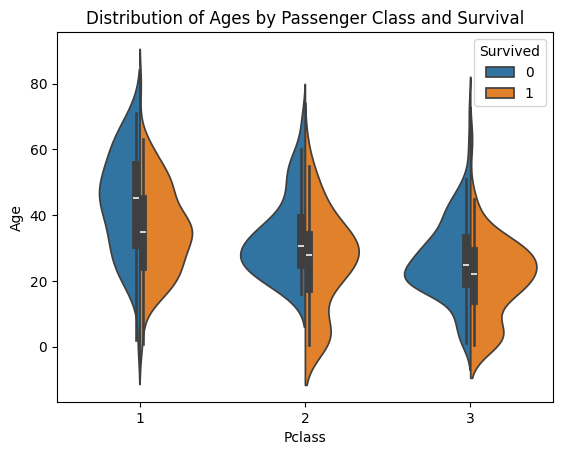

In [30]:
titanic_violin_plot = sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic, split=True)
plt.title('Distribution of Ages by Passenger Class and Survival')
plt.show()

The violin plot created by the provided code displays the distribution of ages among passengers on the Titanic, segmented by their passenger class and survival status. The plot shows three pairs of violin plots, each pair corresponding to one of the three passenger classes. Within each pair, one violin plot represents the age distribution of passengers who survived, while the other represents those who did not survive.

- it can be seen that among the survivors in the first class the average age is higher than in the second and third classes.
- there are more young non-survivors in the third class and first class, in contrast, more young survivors in the second class.
- the age distribution among the survivors is not uniform, especially in the second and third grades.
- Most people were in the 3rd class, following by 2nd class and 1st class with the least number of passengers.


6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


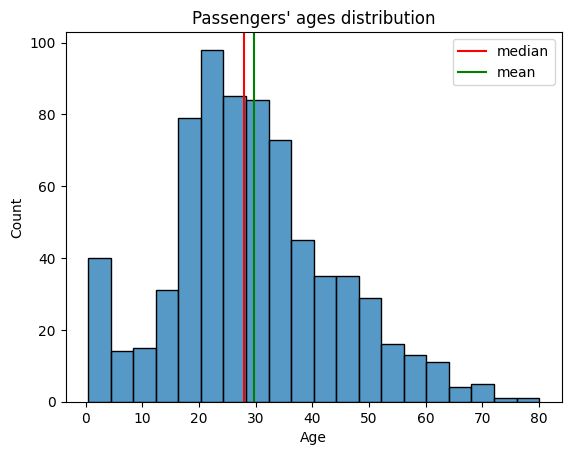

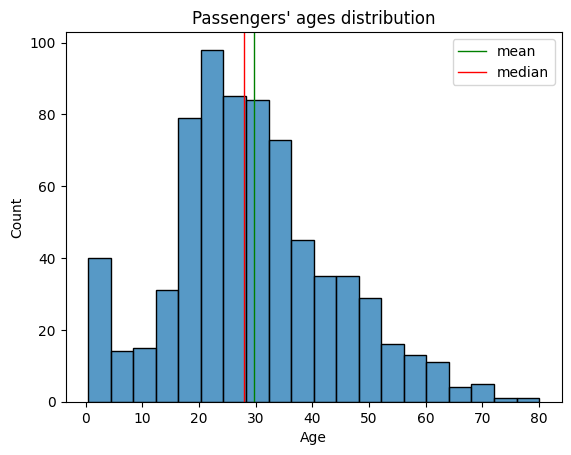

In [43]:
sns.histplot(data=titanic, x='Age')
plt.axvline(titanic['Age'].mean(), color="green", linewidth=1)
plt.axvline(titanic['Age'].median(), color="red", linewidth=1)
plt.title('Passengers\' ages distribution')
plt.legend(['mean', 'median'])


Overall, the distribution shows a concentration of passengers in the young adult age range, with fewer passengers as age increases. There are fewer children compared to the young adult population, but they still make up a significant portion. There's also a small number of elderly passengers. The presence of all age groups suggests that the Titanic carried a diverse cross-section of society at the time.

- The median age, represented by the red dashed line, is a better indicator of the 'typical' age since it is less affected by extreme values. It shows that half of the passengers were younger than 28 years old.

- The mean age is slightly higher than the median, which is expected in a right-skewed distribution. The mean is more sensitive to the presence of older passengers, which pulls the mean to the right.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Як змінювалася ймовірність виживання у залежності від наявності номера каюти (Cabin)?

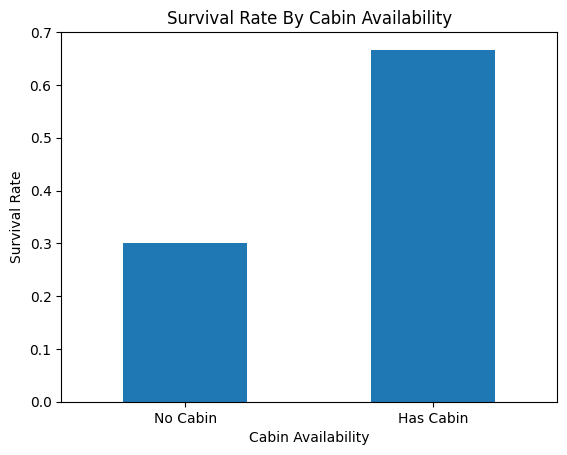

In [47]:
titanic['Has_Cabin'] = titanic['Cabin'].notnull()

cabin_survival_rate = titanic.groupby('Has_Cabin')['Survived'].mean()

cabin_survival_rate.plot(kind='bar')
plt.title('Survival Rate By Cabin Availability')
plt.xlabel('Cabin Availability')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0,1], labels=['No Cabin', 'Has Cabin'], rotation=0)
plt.show()

The graph shows that the survival of passengers with a cabin number was higher than among passengers without a cabin. This may indicate that passengers with a cabin (=more expensive tickets) may have had an advantage in access to lifeboats or received other advantages during the evacuation, increasing their chances of survival.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

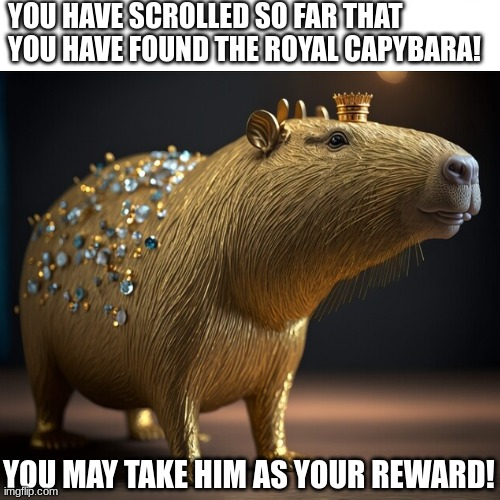